In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
class ANN_PartModel(nn.Module):
    def __init__(self, N_INPUT=3, N_OUTPUT=1, N_HIDDEN=20, N_LAYERS=4):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
        self.apply(self._init_weights)
    def _init_weights(self, module):
      if isinstance(module, nn.Linear):
          nn.init.xavier_normal_(module.weight)
          if module.bias is not None:
              module.bias.data.zero_()
        
    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x
#Plotting Class
# import seaborn as sns
class plotly_3dscatter():
    #input in format plotly_3dscatter(X) where has X one of the following formats
    '''
    input dtype - numpy array or normal nested array
    time always the last element
    1.X=>[[u_i,t_i]...[u_n,t_n]] Plotly - scatter 2d
    2.X=>[[x_i,u_i,t_i]...[x_n,u_n,t_n]] Plotly - scatter 3d
    3.X=>[[x_i,y_i,u_i,t_i]...[x_n,y_n,u_n,t_n]] Plotly - scatter 3d Animation
    '''
    def __init__(self,X=None,marker_size=None,graph_title=None):
        try:
          a = len(X)
        except Exception:
          print("Problem over here",type(X))
          print("Tensor over here converting to np array " if tf.is_type(X) else "Not detecting a tensor")
          try:
            X = X.numpy()
          except Exception:
            print("Problem in converting to numpy")
          input()
        finally:
          print("completing the task")
        if X is None or len(X)==0:
            raise NotImplementedError("X is not given to the class plotly_3dscatter or length error with length {}".format(len(X)))
        self.mode = len(X[0])
        if self.mode < 2 or self.mode > 4:
            raise TypeError("X has mode {} please check".format(self.mode))
        self.marker_size = marker_size
        self.n = len(X)
        self.X = X
        self.fig = None
        self.graph_title = graph_title if graph_title is not None else "Concentration vs Time"
        self.df = pd.DataFrame()
        if self.mode == 2:
            self.df["u"] = X[:,0:1].flatten()
            self.df["t"] = X[:,1:2].flatten()
        elif self.mode == 3:
            self.df["x"] = X[:,0:1].flatten()
            self.df["x"] = X[:,0:1].flatten()
            self.df["u"] = X[:,1:2].flatten()
            self.df["t"] = X[:,2:3].flatten()
        else:
            self.df["x"] = X[:,0:1].flatten()
            self.df["y"] = X[:,1:2].flatten()
            self.df["u"] = X[:,2:3].flatten()
            self.df["t"] = X[:,3:4].flatten()
        self.purify()
    
    def purify(self):
        #possible adding column for markersize for size attribute
        #possible adding column for animation_group creating id for each unique element
        self.df["size_attr"] = np.ones(self.n,dtype=int)
        if self.marker_size is None:
            self.marker_size = 8
        element_id = 0
        element_dict = {}
        id_array = []
        for x in self.X:
            tpl = tuple(x[:-1])
            if tpl in element_dict:
                id_array.append(element_dict[tpl])
            else:
                id_array.append(element_id)
                element_dict[tpl] = element_id
                element_id += 1
        self.total_elements = element_id
        self.df["element_id"] = id_array
        return

    def plot(self):
        #px.scatter for mode 2 and 3
        #px.scatter_3d for mode 4
        #Model implementation for 2 and 3
        print("Going for a plot print with mode {}".format(self.mode))
        if self.mode == 2:
            fig = px.line(self.df,x="t",y="u",title=self.graph_title)
            self.fig = fig
            fig.show()
        elif self.mode==3:
            fig = px.scatter(self.df,x="x",y="u",animation_frame="t",animation_group="element_id",size="size_attr",size_max=self.marker_size)
            self.fig = fig
            fig.show()
        else:
            fig = px.scatter_3d(self.df,title=self.graph_title,x="x",y="y",z="u",animation_frame="t",animation_group="element_id",size="size_attr",size_max=self.marker_size)
            self.fig = fig
            fig.show()
        return
    
    def show_plot(self):
      if self.fig is None:
        raise NotImplementedError("scatter.plot function not implemented")
        return
      self.fig.show()
      return
    
    def return_plot_properties(self):
      if self.fig is None:
        raise NotImplementedError("scatter.plot function not implemented")
        return
      return self.fig

    def properties(self):
        print("Model dimension:{}\nModel mode:{}\nModel elements:{}\nModel markersize:{}".format(self.n,self.mode,self.total_elements,self.marker_size))
        return

class plotly_compar():
  def __init__(self,arr_X,name_models):
    if len(arr_X) != len(name_models):
      raise NotImplementedError("X and name arr are of different lengths i.e. {} and {}".format(len(arr_X),len(name_models)))
    self.arr_X = arr_X
    self.name_models = name_models
    # self.df = None    
    if len(arr_X) == 0 or len(arr_X[0])<2:
      raise NotImplementedError("Please check dimensions of X")
    self.nuller = np.zeros(len(arr_X[0]),dtype="float").reshape(-1,1)
    if len(arr_X[0][0]) == 2:
      for i in range(len(arr_X)):
        arr_X[i] = np.insert(arr_X[i],[0],self.nuller,axis=1)
    if len(arr_X[0][0]) == 3:
      for i in range(len(arr_X)):
        arr_X[i] = np.insert(arr_X[i],[2],self.nuller,axis=1)
    self.arr_n = np.array([])
    for X in arr_X:
      self.arr_n = np.append(self.arr_n,len(X))
    #horizontally stacking all values
    #creating column for color column
    self.color_row = np.array([])
    for i in range(len(self.arr_n)):
      self.color_row = np.hstack((self.color_row,np.repeat(name_models[i],self.arr_n[i])))
    self.x = np.array([])
    self.y = np.array([])
    self.t = np.array([])
    self.u = np.array([])
    for i in range(len(arr_X)):
      self.x = np.hstack((self.x,np.array(arr_X[i][:,0:1]).flatten()))
      self.y = np.hstack((self.y,np.array(arr_X[i][:,1:2]).flatten()))
      self.u = np.hstack((self.u,np.array(arr_X[i][:,2:3]).flatten()))
      self.t = np.hstack((self.t,np.array(arr_X[i][:,3:4]).flatten()))
    print("printing shapes of x,y,u,t")
    print(np.shape(self.x),np.shape(self.y),np.shape(self.u),np.shape(self.t),np.shape(self.color_row))
    # self.df["x"]=self.x
    # self.df["y"]=self.y
    # self.df["u"]=self.u
    # self.df["t"]=self.t
    # self.df["color_row"]=self.color_row
    self.unified_X = np.array([self.x,self.y,self.u,self.t,self.color_row]).T
    print(np.shape(self.unified_X))
  # def create_heatmap(self,t=None,error_range=0.0001,array_indices=[]):
  #   df2 = pd.DataFrame()
  #   def fil(X):
  #     if np.isclose(X[3],rtol=error_range,atol=error_range):
  #       return True
  #     return False
  #   filtered_X = self.united_X[np.array(list(map(fil,self.unified_X)))]
  #   if len(array_indices) < 1:
  #     raise RunTimeError("array_indices ")
  def creater_plot(self,x=None,y=None,t=None,error_range=0.0001):
    df2 = pd.DataFrame()
    def fil(X):
      # print(np.shape(X),X)
      cond = True 
      if x is not None:
        cond = (cond and abs(round(float(X[0]),2)-x)<=error_range)
      if y is not None :
        cond = (cond and abs(round(float(X[1]),2)-y)<=error_range)
      if t is not None:
        cond = (cond and abs(round(float(X[3]),2)-t)<=error_range)
      return cond
    filtered_X = self.unified_X[np.array(list(map(fil,self.unified_X)))]
    print("filtered_X size",np.shape(filtered_X))
    # input()
    print(np.shape(filtered_X),type(filtered_X[0][0]),type(filtered_X[0][4]))
    # print(filtered_X)
    df2["x"] = filtered_X[:,0:1].flatten().astype("float64").round(3)
    # df2["y"] = filtered_X[:,1:2]
    df2["u"] = filtered_X[:,2:3].flatten().astype("float64").round(8)
    # df2["t"] = filtered_X[:,3:4]
    df2["color_row"] = filtered_X[:,4:5].flatten()
    df2.sort_values(by="x")
    # sns.heatmap()
    # df2.round(2)
    # print(df2.to_string())
    fig  = px.line(df2,x="x",y="u",color="color_row",title="time frame:{}s".format(t),hover_data="x")
    return fig

def create_comparision_figure(X,base_name,mod=0,save_plot=False):
    rws = 1 if mod==0 else 3
    fig,ax = plt.subplots(nrows=rws,ncols=1,figsize=(5,5))
    unique_t = pd.unique(X["t"])
    for i,t in enumerate(unique_t):
        df2 = X[X["t"]==t]
        
        if mod:    
            cf0 = ax[1].scatter(df2["x"],df2["y"],c=df2["actual_u"],alpha=0.7,edgecolors="None",cmap='rainbow')
            cf1 = ax[0].scatter(df2["x"],df2["y"],c=df2["predicted_u"],alpha=0.7,edgecolors="None",cmap='rainbow')
            cf2 = ax[2].scatter(df2["x"],df2["y"],c=(df2["predicted_u"]-df2["actual_u"])*0.1,alpha=0.7,edgecolors="None",cmap='rainbow')
            # cbar = fig.colorbar(cf0,ax=ax[0])
            # cbar = fig.colorbar(cf1,ax=ax[1])
            # cbar = fig.colorbar(cf2,ax=ax[2])
        else:
            cf = ax.scatter(df2["x"],df2["y"],c=df2["actual_u"],alpha=0.7,edgecolors="None",marker='s',cmap='rainbow')
            # cbar = fig.colorbar(cf,ax=ax)
        if save_plot:
            plt.savefig(f"./Plot_Model/{base_name}_{i}.png",dpi=200)

In [2]:
def plot_loss_progression(loss_item):
    loss_item = np.array(loss_item)
    m = loss_item.shape[1]
    n = loss_item.shape[0]
    axis_x = np.linspace(1,n,n)
    figure,ax = plt.subplots()
    for i in range(m):
        ax.plot(axis_x,loss_item[:,i],label=f"{i}")
    plt.legend(loc='best')

def plot_plotly(NN,grid):
    u = NN(grid)[:,0]
    np_grid = grid.detach().cpu().numpy()
    np_grid = np.insert(np_grid,[2],u.detach().cpu().numpy().reshape((-1,1)),axis=1)
    model_X = plotly_3dscatter(np_grid)
    model_X.plot()
retreive_FEM_sol_grid = pd.read_csv("./rounded_FEM_sol.csv")
retreive_uniq_x = pd.Series(sorted(pd.unique(retreive_FEM_sol_grid["x"])))
retreive_uniq_x_dict = dict()
for i,x in enumerate(retreive_uniq_x):
    retreive_uniq_x_dict[x] = i
retreive_uniq_y = pd.Series(sorted(pd.unique(retreive_FEM_sol_grid["y"])))
retreive_uniq_y_dict = dict()
for i,x in enumerate(retreive_uniq_y):
    retreive_uniq_y_dict[x] = i
retreive_uniq_t = pd.Series(sorted(pd.unique(retreive_FEM_sol_grid["t"])))
retreive_uniq_t_dict = dict()
retrieve_sol_grid = np.zeros((retreive_uniq_x.size,retreive_uniq_y.size,retreive_uniq_t.size)) * -1000
for i,x in enumerate(retreive_uniq_t):
    retreive_uniq_t_dict[x] = i
retrieve_x = retreive_FEM_sol_grid["x"].to_numpy()
retrieve_y = retreive_FEM_sol_grid["y"].to_numpy()
retrieve_t = retreive_FEM_sol_grid["t"].to_numpy()
retrieve_u = retreive_FEM_sol_grid["u"].to_numpy()
print(retreive_uniq_x_dict,retreive_uniq_t_dict)
print(retreive_uniq_y_dict)
mathanodukhavo = None
for i in range(len(retrieve_x)):
    retrieve_sol_grid[retreive_uniq_x_dict[round(float(retrieve_x[i]),2)]][retreive_uniq_y_dict[round(float(retrieve_y[i]),2)]][retreive_uniq_t_dict[round(float(retrieve_t[i]),2)]] = retrieve_u[i]

def nearest(i,j,k):
    n,m,z = len(retreive_uniq_x),len(retreive_uniq_y),len(retreive_uniq_t)
    cnt = 1 
    while True:
        if i+cnt < n and retrieve_sol_grid[i+cnt][j][k] !=0:
            return retrieve_sol_grid[i+cnt][j][k]
        elif i-cnt >=0 and retrieve_sol_grid[i-cnt][j][k]!=0:
            return retrieve_sol_grid[i-cnt][j][k]
        elif j+cnt < m and retrieve_sol_grid[i][j+cnt][k]!=0:
            return retrieve_sol_grid[i][j+cnt][k]
        elif j-cnt>=0 and retrieve_sol_grid[i][j-cnt][k]!=0:
            return retrieve_sol_grid[i][j-cnt][k]
        elif i+cnt > n and j+cnt > m and i-cnt < 0 and j-cnt < 0:
            break 
        cnt = cnt + 1
    return 0
def retreive_FEM_sol(X2,deviation_matrix=(0,0)):
    global retrieve_sol_grid,mathanodukhavo
    X = X2.detach().cpu().numpy()
    X = X.round(2)
    u = np.ones_like(X[:,0])
    for i in range(X.shape[0]):
        x,y,t = X[i][0],X[i][1],X[i][2]
        x = float(np.around(x,2))+deviation_matrix[0]
        y = float(np.around(y,2))+deviation_matrix[1]
        t = float(np.around(t,2))
        if np.isclose(round(float(t),2),0):
            u[i] = 0
            continue
        try:
            retreive_uniq_x_dict[round(float(x),2)]
            # retreive_uniq_y_dict[round(float(y),2)]
            # retreive_uniq_t_dict[round(float(t),2)]
        except Exception as e:
            mathanodukhavo = x
            # print(mathanodukhavo)
            input(f"X {x} {y} {t} {np.around(y,2)} {type(y)} {type(X)} {float(str(e))}")
        try:
            # retreive_uniq_x_dict[round(float(x),2)]
            retreive_uniq_y_dict[round(float(y),2)]
            # retreive_uniq_t_dict[round(float(t),2)]
        except Exception as e:
            mathanodukhavo = y
            # print(mathanodukhavo)
            input(f"Y {x} {y} {t} {np.around(y,2)} {type(y)} {type(X)} {float(str(e))}")
        try:
            # retreive_uniq_x_dict[round(float(x),2)]
            # retreive_uniq_y_dict[round(float(y),2)]
            retreive_uniq_t_dict[round(float(t),2)]
        except Exception as e:
            mathanodukhavo = y
            # print(mathanodukhavo)
            input(f"T {x} {y} {t} {np.around(y,2)} {type(y)} {type(X)} {float(str(e))}")
        if np.isclose(t,0):
            u[i] = 0
        else:
            u[i] = retrieve_sol_grid[retreive_uniq_x_dict[round(float(x),2)]][retreive_uniq_y_dict[round(float(y),2)]][retreive_uniq_t_dict[round(float(t),2)]]
            if np.isclose(u[i],0):
                # input(f"Checking at index {round(float(x),2)} {round(float(y),2)} {round(float(t),2)}")
                u[i] = nearest(retreive_uniq_x_dict[round(float(x),2)],retreive_uniq_y_dict[round(float(y),2)],retreive_uniq_t_dict[round(float(t),2)])
    return torch.Tensor(u).reshape((-1,1)).detach()

{0.0: 0, 0.01: 1, 0.02: 2, 0.03: 3, 0.04: 4, 0.05: 5, 0.06: 6, 0.07: 7, 0.08: 8, 0.09: 9, 0.1: 10, 0.11: 11, 0.12: 12, 0.13: 13, 0.14: 14, 0.15: 15, 0.16: 16, 0.17: 17, 0.18: 18, 0.19: 19, 0.2: 20, 0.21: 21, 0.22: 22, 0.23: 23, 0.24: 24, 0.25: 25, 0.26: 26, 0.27: 27, 0.28: 28, 0.29: 29, 0.3: 30, 0.31: 31, 0.32: 32, 0.33: 33, 0.34: 34, 0.35: 35, 0.36: 36, 0.37: 37, 0.38: 38, 0.39: 39, 0.4: 40, 0.41: 41, 0.42: 42, 0.43: 43, 0.44: 44, 0.45: 45, 0.46: 46, 0.47: 47, 0.48: 48, 0.49: 49, 0.5: 50, 0.51: 51, 0.52: 52, 0.53: 53, 0.54: 54, 0.55: 55, 0.56: 56, 0.57: 57, 0.58: 58, 0.59: 59, 0.6: 60, 0.61: 61, 0.62: 62, 0.63: 63, 0.64: 64, 0.65: 65, 0.66: 66, 0.67: 67, 0.68: 68, 0.69: 69, 0.7: 70, 0.71: 71, 0.72: 72, 0.73: 73, 0.74: 74, 0.75: 75, 0.76: 76, 0.77: 77, 0.78: 78, 0.79: 79, 0.8: 80, 0.81: 81, 0.82: 82, 0.83: 83, 0.84: 84, 0.85: 85, 0.86: 86, 0.87: 87, 0.88: 88, 0.89: 89, 0.9: 90, 0.91: 91, 0.92: 92, 0.93: 93, 0.94: 94, 0.95: 95, 0.96: 96, 0.97: 97, 0.98: 98, 0.99: 99, 1.0: 100} {0.1: 0, 

In [3]:
cpu_device =  "cpu"
cuda_device = "cuda:0"
gpu_device = "cuda:0"
J = -1
D = 0.4

In [4]:
#Neural Model based on neumann conditions on x and y
class New_Neural_Model():
    def __init__(self,length,breadth,J_func_x,J_func_y,t_range,total_x_points
                ,total_y_points,total_t_points,initial_conc=0):
        self.length = length 
        self.breadth = breadth
        self.J_func_x = J_func_x
        self.J_func_y = J_func_y
        self.t_range = t_range 
        self.total_x_points = total_x_points
        self.total_y_points = total_y_points
        self.total_t_points = total_t_points
        self.initial_conc = initial_conc
        self.generate_data_points(total_x_points,total_y_points,total_t_points)
    
    def generate_data_points(self,nx,ny,nt):
        self.tensor_xx = torch.Tensor(np.round(np.linspace(0,self.length,nx,dtype=np.float16),2))
        self.tensor_yy = torch.Tensor(np.round(np.linspace(0,self.breadth,ny,dtype=np.float16),2))
        self.tensor_tt = torch.Tensor(np.round(np.linspace(0,self.t_range,nt,dtype=np.float16),2))
        self.tensor_xx,self.tensor_yy,self.tensor_tt = torch.meshgrid(self.tensor_xx,self.tensor_yy,self.tensor_tt)
        self.tensor_xx = torch.flatten(self.tensor_xx)
        self.tensor_yy = torch.flatten(self.tensor_yy)
        self.tensor_tt = torch.flatten(self.tensor_tt)
        self.tensor_xx.requires_grad = True 
        self.tensor_yy.requires_grad = True 
        self.tensor_tt.requires_grad = True 
        self.mod_tensor_xx = self.tensor_xx.reshape((-1,1))
        self.mod_tensor_yy = self.tensor_yy.reshape((-1,1))
        self.mod_tensor_tt = self.tensor_tt.reshape((-1,1))
        self.tensor_grid = torch.cat((self.mod_tensor_xx,self.mod_tensor_yy,self.mod_tensor_tt),1)
        self.left_tensor = torch.cat((self.mod_tensor_tt,self.mod_tensor_xx,self.mod_tensor_yy),1)
        self.right_tensor_top = torch.full((self.tensor_xx.size()[0],1),self.initial_conc)
        self.right_tensor_middle = self.J_func_x(self.tensor_grid)
        self.right_tensor_bottom = self.J_func_y(self.tensor_grid)
        print(self.tensor_xx.size(),self.right_tensor_top.size(),self.right_tensor_middle.size(),self.right_tensor_bottom.size())
        self.right_tensor = torch.cat((self.right_tensor_top,self.right_tensor_middle,self.right_tensor_bottom),1)

class DataLoader_Class(Dataset):
    def __init__(self,dst,taking_sol=False,deviation_matrix=(0,0)):
        self.tensor_xx = dst.tensor_xx
        self.tensor_yy = dst.tensor_yy 
        self.tensor_tt = dst.tensor_tt
        self.left_tensor = dst.left_tensor 
        self.right_tensor = dst.right_tensor
        self.len = self.tensor_xx.size()[0]
        if taking_sol:
            self.right_sol = retreive_FEM_sol(dst.tensor_grid,deviation_matrix=deviation_matrix)
        else:
            self.right_sol = torch.zeros_like(self.tensor_xx)
        self.npx = dst.tensor_xx.detach().cpu().numpy().reshape((-1,1))
        self.npy = dst.tensor_yy.detach().cpu().numpy().reshape((-1,1))
        self.npt = dst.tensor_tt.detach().cpu().numpy().reshape((-1,1))
        self.ngrid = np.concatenate((self.npx,self.npy,self.npt),axis=1)
        self.ngrid = np.insert(self.ngrid,[2],self.right_sol.detach().cpu().numpy().reshape((-1,1)),axis=1)

    
    def __getitem__(self, i):
        return self.tensor_xx[i].to(cuda_device),self.tensor_yy[i].to(cuda_device),self.tensor_tt[i].to(cuda_device),self.left_tensor[i].to(cuda_device),self.right_tensor[i].to(cuda_device),self.right_sol[i].to(cuda_device)
    
    def __len__(self):
        return self.len

def grad(u,x,retain_graph=True,create_graph=True):
    return torch.autograd.grad(u,x,grad_outputs=torch.ones_like(u),create_graph=create_graph,retain_graph=True)[0].to(cuda_device)


In [5]:
#Training Part Generation
loss_array = []
def Train_Network(Data,save_name,model1_run_time=100,check_true=False,deviation_matrix=None,neuron_per_layer=100,layers=5,batch_size=1000,lr=0.0001):
    print("Going to Train Network")
    current_model_loss = 1e9
    NN = ANN_PartModel(3,3,neuron_per_layer,layers).to(cuda_device)
    optimizer = torch.optim.Adam(NN.parameters(),lr=lr)
    dst = DataLoader(Data,batch_size=1000,shuffle=False)
    for i in range(model1_run_time):
        acc_netloss = 0
        acc_loss1 = 0
        acc_loss2 = 0
        acc_loss3 = 0
        acc_loss4 = 0
        acc_loss5 = 0
        for _,[mini_xx,mini_yy,mini_tt,mini_left,mini_right,mini_right_sol] in enumerate(dst):
            torch.cuda.empty_cache()
            optimizer.zero_grad()
            # mini_xx.requires_grad = True
            # mini_yy.requires_grad = True 
            # mini_tt.requires_grad = True 
            mini_grid = torch.cat((mini_xx.reshape(-1,1),mini_yy.reshape((-1,1)),mini_tt.reshape(-1,1)),1).to(cuda_device)
            mini_sol = NN(mini_grid)
            mini_sol = torch.add(torch.mul(mini_left,mini_sol),mini_right)
            c,dc_dx,dc_dy = mini_sol[:,0],mini_sol[:,1],mini_sol[:,2]
            odc_dx = grad(c,mini_xx)
            odc_dy = grad(c,mini_yy)
            od2c_dy2 = grad(odc_dy,mini_yy)
            od2c_dx2 = grad(odc_dx,mini_xx)
            d2c_dx2 = grad(dc_dx,mini_xx)
            d2c_dy2 = grad(dc_dy,mini_yy)
            dc_dt = grad(c,mini_tt)
            loss1 = torch.mean((odc_dx-dc_dx)**2)
            loss2 = torch.mean((odc_dy-dc_dy)**2)
            loss3 = torch.mean((torch.subtract(dc_dt,torch.mul(D,torch.add(d2c_dx2,d2c_dy2))))**2)
            loss5 = torch.mean((torch.subtract(dc_dt,torch.mul(D,torch.add(od2c_dx2,od2c_dy2))))**2)
            # print("Mini grid size ",mini_grid.size())
            if check_true:
                # dev_x,dev_y = deviation_matrix[0],deviation_matrix[1]
                # dev_x = torch.mul(dev_x,torch.ones_like(mini_grid[:,0])).reshape((-1,1))
                # dev_y = torch.mul(dev_y,torch.ones_like(mini_grid[:,0])).reshape((-1,1))
                # dev_t = torch.zeros_like(mini_grid[:,0]).reshape((-1,1))
                # # print("diff shapes",dev_x.size(),dev_y.size(),dev_t.size())
                # deviation_matrix = torch.cat((dev_x,dev_y,dev_t),1).to(cuda_device)
                # deviation_matrix = torch.add(mini_grid,deviation_matrix)
                # true_sol = retreive_FEM_sol(torch.round(deviation_matrix,decimals=2)).to(cuda_device)
                loss4 = torch.mean((c-mini_right_sol)**2)
            net_loss = torch.add(torch.add(loss1,torch.add(loss2,loss3)),loss5)
            if check_true:
                net_loss = torch.add(net_loss,loss4)
            net_loss.backward(retain_graph=True)
            optimizer.step()
            acc_loss1 = acc_loss1 + loss1.item()
            acc_loss2 = acc_loss2 + loss2.item()
            acc_loss3 = acc_loss3 + loss3.item()
            if check_true:
                acc_loss4 = acc_loss4 + loss4.item()
            acc_loss5 = acc_loss5 + loss5.item()
            acc_netloss += net_loss.item()
            print(f"Step {i}_{_}: Loss{net_loss.item()}")
        print(f"Step {i}: Accumulated_loss:{acc_netloss}")
        loss_array.append([acc_loss1,acc_loss2,acc_loss3,acc_loss5,acc_netloss])  
        if check_true:
            loss_array[-1].append(acc_loss4)
        if acc_netloss < current_model_loss:
            current_model_loss = acc_netloss
            torch.save(NN.state_dict(),f"./Trained_Torch_models/{save_name}.pth")
            torch.save(optimizer.state_dict(),f"./Trained_Torch_models/{save_name}_optimizer.pth")
              



In [24]:
torch.cuda.empty_cache()
def model_1_J_x(grid):
    zero_tensor = torch.Tensor([0])
    n = grid.size()[0]
    values = torch.zeros(n)
    for i in range(n):
        if torch.isclose(grid[i][0],zero_tensor):
            values[i] = J 
    return values.reshape((-1,1))

def model_1_J_y(grid):
    zero_tensor = torch.Tensor([0])
    n = grid.size()[0]
    values = torch.zeros(n)
    for i in range(n):
        if torch.isclose(grid[i][1],zero_tensor):
            values[i] = J 
    return values.reshape((-1,1))
Data_Set1 = New_Neural_Model(0.3,0.4,model_1_J_x,model_1_J_y,1,31,41,11,0)
# Tensor_Dataloader = DataLoader_Class(Data_Set1,True,(0,0.6))
loss_array = []
# df_tmp = pd.DataFrame(Tensor_Dataloader.ngrid,columns=["x","y","actual_u","t"])
# create_comparision_figure(df_tmp,"checker_name",0,False)
# Train_Network(Tensor_Dataloader,"PINN_4_NN1",200,True,(0,0.6),200,6,2000,lr=0.001)

torch.Size([13981]) torch.Size([13981, 1]) torch.Size([13981, 1]) torch.Size([13981, 1])


In [25]:
Tensor_Dataloader = DataLoader_Class(Data_Set1,True,(0,0.6))

In [9]:
torch.cuda.empty_cache()

In [9]:
# print(np.array(loss_array).shape)
import copy
# loss_array_1 = copy.deepcopy(loss_array)
# plot_loss_progression(loss_array)

IndexError: tuple index out of range

In [ ]:
#Plotting to check 2 days work 
NN_tmp = ANN_PartModel(3,3,200,6).to(cuda_device)
NN_tmp.load_state_dict(torch.load("./Trained_Torch_models/PINN_4_NN1.pth"))
plot_plotly(NN_tmp,Data_Set1.tensor_grid.to(cuda_device))

In [8]:
def model_3_J_x(grid):
    zero_tensor = torch.Tensor([0])
    n = grid.size()[0]
    values = torch.zeros(n)
    for i in range(n):
        if torch.isclose(grid[i][0],zero_tensor):
            values[i] = J 
    return values.reshape((-1,1))

def model_3_J_y(grid):
    zero_tensor = torch.Tensor([0])
    n = grid.size()[0]
    values = torch.zeros(n)
    return values.reshape((-1,1))

Data_Set3 = New_Neural_Model(0.7,0.2,model_3_J_x,model_3_J_y,1,71,41,11,0)
# Tensor_Dataloader_3 = DataLoader_Class(Data_Set3,True,(0.3,0.4))
loss_array = []
# df_tmp = pd.DataFrame(Tensor_Dataloader_3.ngrid,columns=["x","y","actual_u","t"])
# create_comparision_figure(df_tmp,"checker_name",0,False)
# Train_Network(Tensor_Dataloader_3,"PINN_4_NN3",100,True,(0.3,0.4),200,6,2000,0.0008)

torch.Size([32021]) torch.Size([32021, 1]) torch.Size([32021, 1]) torch.Size([32021, 1])


In [14]:
Tensor_Dataloader_3 = DataLoader_Class(Data_Set3,True,(0.3,0.4))

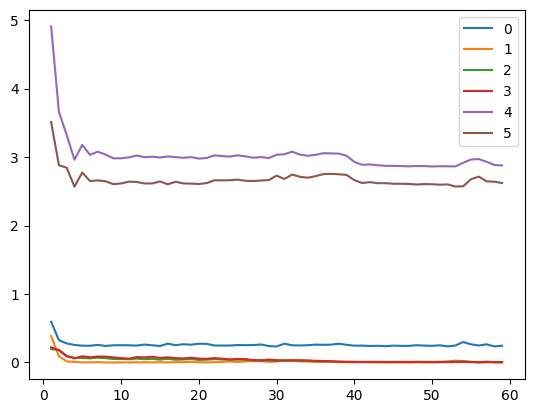

In [ ]:
# print(np.array(loss_array).shape)
import copy
loss_array_3 = copy.deepcopy(loss_array)
plot_loss_progression(loss_array_3)
#Plotting to check 2 days work 

In [ ]:
NN_tmp = ANN_PartModel(3,3,200,6).to(cuda_device)
NN_tmp.load_state_dict(torch.load("./Trained_Torch_models/PINN_4_NN3.pth"))
plot_plotly(NN_tmp,Data_Set3.tensor_grid.to(cuda_device))

In [10]:
#One of the challenging functions to be written
torch.cuda.empty_cache()
NN_tmp = ANN_PartModel(3,3,200,6).to(cuda_device)
NN_tmp.load_state_dict(torch.load("./Trained_Torch_models/PINN_4_NN1.pth"))
dev_x_J = torch.Tensor([0.3,0,0])
def model_2_J_x(grid):
    global dev_x_J
    NN_tmp = ANN_PartModel(3,3,200,6)
    NN_tmp.load_state_dict(torch.load("./Trained_Torch_models/PINN_4_NN1.pth"))
    zero_tensor = torch.Tensor([0])
    n = grid.size()[0]
    values = torch.zeros(n)
    for i in range(n):
        if torch.isclose(grid[i][0],zero_tensor):
            values[i] = NN_tmp(grid[i]+dev_x_J)[0]#.to(cpu_device)
    return values.reshape((-1,1))
dev_y_J = torch.Tensor([0,0.2,0])
def model_2_J_y(grid):
    global dev_x_J
    NN_tmp = ANN_PartModel(3,3,200,6)
    NN_tmp.load_state_dict(torch.load("./Trained_Torch_models/PINN_4_NN3.pth"))
    zero_tensor = torch.Tensor([0])
    n = grid.size()[0]
    values = torch.zeros(n)
    for i in range(n):
        if torch.isclose(grid[i][1],zero_tensor):
            values[i] = NN_tmp(grid[i]+dev_y_J)[1]
    return values.reshape((-1,1))

Data_Set2 = New_Neural_Model(0.7,0.4,model_2_J_x,model_2_J_y,1,71,41,11,0)
# Tensor_Dataloader_2 = DataLoader_Class(Data_Set2,True,(0.3,0.6))
loss_array = []
# df_tmp = pd.DataFrame(Tensor_Dataloader_2.ngrid,columns=["x","y","actual_u","t"])
# create_comparision_figure(df_tmp,"checker_name",0,False)
# Train_Network(Tensor_Dataloader_2,"PINN_4_NN2",100,True,(0.3,0.6),200,6,1000,0.0008)

torch.Size([32021]) torch.Size([32021, 1]) torch.Size([32021, 1]) torch.Size([32021, 1])


In [15]:
Tensor_Dataloader_2 = DataLoader_Class(Data_Set2,True,(0.3,0.6))

In [11]:
torch.cuda.empty_cache()

In [ ]:
torch.cuda.empty_cache()

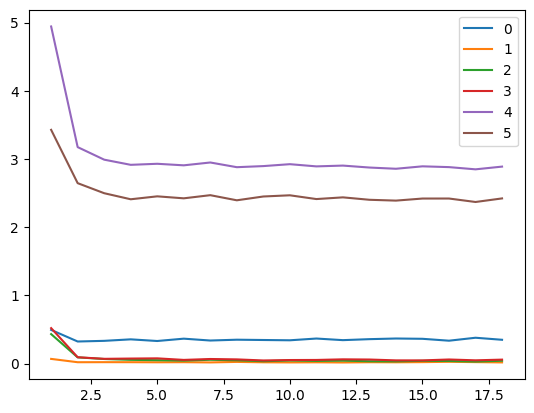

In [ ]:

import copy
loss_array_4 = copy.deepcopy(loss_array)
plot_loss_progression(loss_array_4)

In [ ]:
NN_tmp = ANN_PartModel(3,3,200,6).to(cuda_device)
NN_tmp.load_state_dict(torch.load("./Trained_Torch_models/PINN_4_NN2.pth"))
plot_plotly(NN_tmp,Data_Set2.tensor_grid.to(cuda_device))

In [26]:
#plotting_error_propagation_plot
#neural - 1
verifying_x1,verifying_y1,verifying_t1,verifying_u1 = Tensor_Dataloader.tensor_xx,Tensor_Dataloader.tensor_yy,Tensor_Dataloader.tensor_tt,Tensor_Dataloader.right_sol
verifying_grid1 = torch.cat((verifying_x1.reshape((-1,1)),verifying_y1.reshape((-1,1)),verifying_t1.reshape((-1,1))),-1)
NN_tmp = ANN_PartModel(3,3,200,6)
NN_tmp.load_state_dict(torch.load("./Trained_Torch_models/PINN_4_NN1.pth"))
verifying_pred1 = torch.flatten(NN_tmp(verifying_grid1)[:,0])
error_grid_1 = verifying_u1 - verifying_pred1
df1 = pd.DataFrame()
df1["x"] = verifying_x1.detach().numpy()
df1["y"] = verifying_y1.detach().numpy()
df1["t"] = verifying_t1.detach().numpy()
df1["actual_u"] = verifying_u1.detach().numpy()
df1["predicted_u"] = verifying_pred1.detach().numpy()
# create_comparision_figure(df1,"Neural_Network_4_1",1)#,True)
df1.to_csv("./DST1")


In [27]:
df1.to_csv("./DST1")

In [18]:
#neural - 2
verifying_x2,verifying_y2,verifying_t2,verifying_u2 = Tensor_Dataloader_2.tensor_xx,Tensor_Dataloader_2.tensor_yy,Tensor_Dataloader_2.tensor_tt,Tensor_Dataloader_2.right_sol
verifying_grid2 = torch.cat((verifying_x2.reshape((-1,1)),verifying_y2.reshape((-1,1)),verifying_t2.reshape((-1,1))),-1)
NN_tmp = ANN_PartModel(3,3,200,6)
NN_tmp.load_state_dict(torch.load("./Trained_Torch_models/PINN_4_NN2.pth"))
verifying_pred2 = torch.flatten(NN_tmp(verifying_grid2)[:,0])
error_grid_2 = verifying_u2 - verifying_pred2
df2 = pd.DataFrame()
df2["x"] = verifying_x2.detach().numpy()
df2["y"] = verifying_y2.detach().numpy()
df2["t"] = verifying_t2.detach().numpy()
df2["actual_u"] = verifying_u2.detach().numpy()
df2["predicted_u"] = verifying_pred2.detach().numpy()
# create_comparision_figure(df2,"Neural_Network_4_2",1)#,True)


In [19]:
df2.to_csv("./DST2")

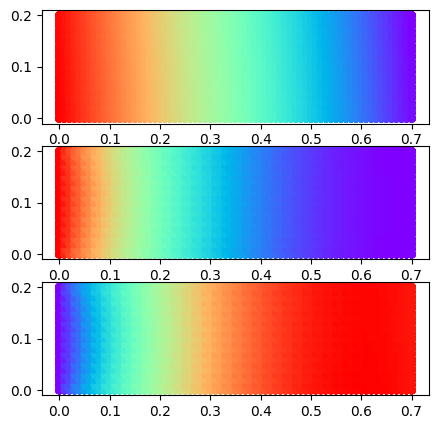

In [21]:
#neural - 3
verifying_x3,verifying_y3,verifying_t3,verifying_u3 = Tensor_Dataloader_3.tensor_xx,Tensor_Dataloader_3.tensor_yy,Tensor_Dataloader_3.tensor_tt,Tensor_Dataloader_3.right_sol
verifying_grid3 = torch.cat((verifying_x3.reshape((-1,1)),verifying_y3.reshape((-1,1)),verifying_t3.reshape((-1,1))),-1)
NN_tmp = ANN_PartModel(3,3,200,6)
NN_tmp.load_state_dict(torch.load("./Trained_Torch_models/PINN_4_NN3.pth"))
verifying_pred3 = torch.flatten(NN_tmp(verifying_grid3)[:,0])
error_grid_3 = verifying_u3 - verifying_pred3
df3 = pd.DataFrame()
df3["x"] = verifying_x3.detach().numpy()
df3["y"] = verifying_y3.detach().numpy()
df3["t"] = verifying_t3.detach().numpy()
df3["actual_u"] = verifying_u3.detach().numpy()
df3["predicted_u"] = verifying_pred3.detach().numpy()
create_comparision_figure(df3,"Neural_Network_4_3",1)#,True)


In [22]:
df3.to_csv("./DST3")

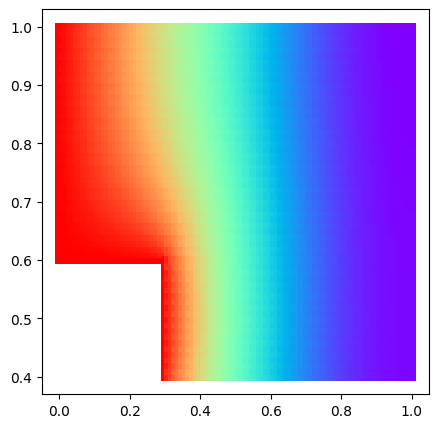

In [28]:
#generating final_data_points
D1 = df1.copy(deep=True)
D5 = df1.copy(deep=True)
D2 = df2.copy(deep=True)
D4 = df2.copy(deep=True)
D3 = df3 .copy(deep=True)
D3["x"] = D3["x"] + 0.3
D3["y"] = D3["y"] + 0.4 
D1["y"] = D1["y"] + 0.6
D2["x"] = D2["x"] + 0.3
D2["y"] = D2["y"] + 0.6
D4["y"] = 0.4-2*D4["y"]
D5["y"] = 0.4-1*D5["y"]
D4["x"] = D4["x"]+0.3
combined_D = pd.concat([D1,D2,D3],join="inner",ignore_index=True)
create_comparision_figure(combined_D,"Combined_NN_4_ult",0,True)


In [ ]:
a = pd.Series([1,2,3])
for i,x in enumerate(a):
    print(i,x)

0 1
1 2
2 3
